## Data augmentation techniques: Traditional data augmentation & Style data augmentation

### Traditional data augmentation

In [ ]:
import glob
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
import glob
import tensorflow.keras as keras
import imgaug as ia
from styleaug import StyleAugmentor

self_classes = []
classes = [i.split(os.path.sep)[1] for i in glob.glob('/Volumes/LogisP/Videos/GTA/Frames/*')]

self_classes = [i.split(os.path.sep)[1] for i in glob.glob('/Volumes/LogisP/Videos/GTA/Frames/*')]
classes.sort()
target_shape=(112, 112, 3)


#data_aug_1 = keras.preprocessing.image.ImageDataGenerator(
 #   zoom_range=.1,
  #  horizontal_flip=True,
  #  rotation_range=8,
  #  width_shift_range=.2,
  #  height_shift_range=.2)

#By specifying the rotation_range , the data generated is randomly rotated 
#by an angle in the range of +rotation_range to -rotation_range (in degrees).
data_aug_2 = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=90
)

#The width_shift_range is a floating point number between 0.0 and 1.0 which
# specifies the upper bound of the fraction of the total width by which the image
# is to be randomly shifted, either towards the left or right.
data_aug_3 = keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=0.3
)

#Exactly like width shifting, except that the image is shifted vertically instead of horizontally.
data_aug_4 = keras.preprocessing.image.ImageDataGenerator(
    height_shift_range=0.3
)

#The generator will generate images, which on a random basis, will be horizontally flipped.
data_aug_5 = keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip=True
)

#Instead of flipping horizontally, we can also apply a vertical flip
data_aug_6 = keras.preprocessing.image.ImageDataGenerator(
    vertical_flip=True
)

#Shear transformation slants the shape of the image. 'shear_range' specifies the angle of the slant in degrees.
data_aug_7 = keras.preprocessing.image.ImageDataGenerator(
    shear_range=45.0
)

#A random zoom is obtained by the zoom_range argument. A zoom less than 1.0 magnifies the image, while a zoom greater than 1.0 zooms out of the image.
data_aug_8 = keras.preprocessing.image.ImageDataGenerator(
    zoom_range=[0.5, 1.5]
)

#Channel shift randomly shifts the channel values by a random value chosen from the range specified by channel_shift_range.
data_aug_9 = keras.preprocessing.image.ImageDataGenerator(
    brightness_range=[0.5, 0.7]
)
    
def image_StyleAugmentation(embedding, image, augmentor):
    from styleaug import StyleAugmentor
    import torch
    from torchvision.transforms import ToTensor, ToPILImage
    from PIL import Image
    import matplotlib.pyplot as plt
    import numpy as np
    import imgaug as ia

    # PyTorch Tensor <-> PIL Image transforms:
    toTensor = ToTensor()
    toPIL = ToPILImage()
    
    # load image:
    im = Image.fromarray((image * 255).astype(np.uint8))
    im_torch = toTensor(im).unsqueeze(0) # 1 x 3 x 256 x 256

    # randomize style:
    new_image = augmentor(im_torch, embedding=embedding)

    #convert Tensor to PIL image, convert PIL image to numpy ndarray
    numpy_image = np.array(toPIL(new_image.squeeze().cpu()))
    
    #show numpy image
    #ia.imshow(numpy_image)
    
    #show Tensor image
    #plt.imshow(toPIL(new_image.squeeze().cpu()))
    #plt.show()
    
    return (numpy_image / 255)


def generate_video_batch(batch_filepath, batch_framestart):
    """
    Parameters:
        batch_filepath: this is the path from one batch
        batch_framestart: 
    Output:
         Return one batch from input sequence
    """
   
    batch_images = []
    for frame in range(batch_framestart, batch_framestart + 16):
        read_img = cv2.imread((batch_filepath
                               + "/"
                               + "{:0>6d}".format(frame)
                               + ".jpg")) # path of image
        image = cv2.cvtColor(read_img, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (112, 112))#interpolation=cv2.INTER_AREA)
 
 

        #print("De shape is: ", image.shape)
        batch_images.append(image / 255) 
    return batch_images

def __data_aug(self_classes,target_shape,data_aug_traditionalTechniques, data_list):
    """ Make random transformation based on ImageGenerator arguments""" 
    T = None
    X, Y = [], []

    #read text file with sequences
    path = data_list
    with open(path, 'r') as f:
        videos_list = f.readlines()
    
    line_num =0
    augmentation_technique = []
    for batch in (videos_list):
        line_num += 1
        read_batch = batch.split(" ")
        data_location = read_batch[0].split("/")[5:]
        batch_filepath = "/Volumes/LogisP/Videos/GTA/" + str(data_location[0]) + "/" + str(data_location[1] +"/")
        batch_framestart = int(read_batch[1])
        label = int(read_batch[2]) # one hot encoding

        y = []        
        x = []

        image_batch = generate_video_batch(batch_filepath, batch_framestart)
        
        #Choose between traditional techniques
        
        if(len(augmentation_technique) == 0):
            data_aug = data_aug_traditionalTechniques[0]
            augmentation_technique.append(1)
        elif(len(augmentation_technique) == 1):
            data_aug = data_aug_traditionalTechniques[1]
            augmentation_technique.append(1)
        elif(len(augmentation_technique) == 2):
            data_aug = data_aug_traditionalTechniques[2]
            augmentation_technique.append(1)
        elif(len(augmentation_technique) == 3):
            data_aug = data_aug_traditionalTechniques[3]
            augmentation_technique.append(1)
        elif(len(augmentation_technique) == 4):
            data_aug = data_aug_traditionalTechniques[4]
            augmentation_technique.append(1)
        elif(len(augmentation_technique) == 5):
            data_aug = data_aug_traditionalTechniques[5]
            augmentation_technique.append(1)
        elif(len(augmentation_technique) == 6):
            data_aug = data_aug_traditionalTechniques[6]
            augmentation_technique.append(1)
        else:
            data_aug = data_aug_traditionalTechniques[7]
            augmentation_technique = augmentation_technique.clear() 
            augmentation_technique = []
        
        T = data_aug.get_random_transform(target_shape[:2])
        
        for img in image_batch:
            ####If you want apply traditional data augmentation
            
            #if technique is channel shift
            if(len(augmentation_technique) == 0): 
                x.append(data_aug.apply_transform(img, T).astype('uint32')/255)
            else:
                x.append(data_aug.apply_transform(img, T))
            #x.append(data_aug.apply_transform(img, T))
            #print('Data augmentation afbeelding: ')
            #ia.imshow(data_aug.apply_transform(img, T).astype('uint32'))
            #print(data_aug.apply_transform(img, T).astype('uint32')/255)
            #.astype('uint8')
            #print('type = :) ',type(data_aug.apply_transform(img, T)))
            #print('Orginele afbeelding: ')
            #ia.imshow(img)
            
            #x.append(img)
            
        y = label
        X.append(x)
        Y.append(y)

        y = []        
        x = []
        
        #for img in image_batch:
         #   x.append(img)
        #y = label
        
        #X.append(x)
        #Y.append(y)
        
        print("Running: ",round((line_num/len(videos_list)*100),1), "% complete")
    return np.array(X), np.array(Y)

In [2]:
data_aug_traditionalTechniques = [data_aug_2, data_aug_3, data_aug_4, data_aug_5, data_aug_6, data_aug_7, data_aug_8, data_aug_9 ]


### Style data augmentation

In [ ]:
import glob
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
import glob
import tensorflow.keras as keras
import imgaug as ia
from styleaug import StyleAugmentor

self_classes = []
classes = [i.split(os.path.sep)[1] for i in glob.glob('/Volumes/LogisP/Videos/GTA/Frames/*')]

self_classes = [i.split(os.path.sep)[1] for i in glob.glob('/Volumes/LogisP/Videos/GTA/Frames/*')]
classes.sort()
target_shape=(112, 112, 3)

    
def image_StyleAugmentation(embedding, image, augmentor):
    from styleaug import StyleAugmentor
    import torch
    from torchvision.transforms import ToTensor, ToPILImage
    from PIL import Image
    import matplotlib.pyplot as plt
    import numpy as np
    import imgaug as ia

    # PyTorch Tensor <-> PIL Image transforms:
    toTensor = ToTensor()
    toPIL = ToPILImage()
    
    # load image:
    im = Image.fromarray((image * 255).astype(np.uint8))
    im_torch = toTensor(im).unsqueeze(0) # 1 x 3 x 256 x 256

    # randomize style:
    new_image = augmentor(im_torch, embedding=embedding)

    #convert Tensor to PIL image, convert PIL image to numpy ndarray
    numpy_image = np.array(toPIL(new_image.squeeze().cpu()))
    
    #show numpy image
    #ia.imshow(numpy_image)
    
    #show Tensor image
    #plt.imshow(toPIL(new_image.squeeze().cpu()))
    #plt.show()
    
    return (numpy_image / 255)


def generate_video_batch(batch_filepath, batch_framestart):
    """
    Parameters:
        batch_filepath: this is the path from one batch
        batch_framestart: 
    Output:
         Return one batch from input sequence
    """
   
    batch_images = []
    for frame in range(batch_framestart, batch_framestart + 16):
        read_img = cv2.imread((batch_filepath
                               + "/"
                               + "{:0>6d}".format(frame)
                               + ".jpg")) # path of image
        image = cv2.cvtColor(read_img, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (112, 112))#interpolation=cv2.INTER_AREA)
 
 

        #print("De shape is: ", image.shape)
        batch_images.append(image / 255) 
    return batch_images

def __data_aug(self_classes,target_shape, data_list):
    """ Make random transformation based on ImageGenerator arguments""" 
    T = None
    X, Y = [], []

    #read text file with sequences
    path = data_list
    with open(path, 'r') as f:
        videos_list = f.readlines()
    
    line_num =0
    augmentation_technique = []
    for batch in (videos_list):
        line_num += 1
        read_batch = batch.split(" ")
        data_location = read_batch[0].split("/")[5:]
        batch_filepath = "/Volumes/LogisP/Videos/GTA/" + str(data_location[0]) + "/" + str(data_location[1] +"/")
        batch_framestart = int(read_batch[1])
        label = int(read_batch[2]) # one hot encoding

        y = []        
        x = []

        image_batch = generate_video_batch(batch_filepath, batch_framestart)
        
        augmentor = StyleAugmentor()
        batch_size = 1
        embedding = augmentor.sample_embedding(batch_size)
        
        for img in image_batch:            
            image_styleAugmented = image_StyleAugmentation(embedding, img, augmentor)
            x.append(image_styleAugmented)
            #ia.imshow(image_styleAugmented)
            
        y = label
        X.append(x)
        Y.append(y)

        y = []        
        x = []
        
        #for img in image_batch:
         #   x.append(img)
        #y = label
        
        #X.append(x)
        #Y.append(y)
        
        print("Running: ",round((line_num/len(videos_list)*100),1), "% complete")
    return np.array(X), np.array(Y)

In [18]:
import glob
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
import glob
import tensorflow.keras as keras
import imgaug as ia
from styleaug import StyleAugmentor

self_classes = []
classes = [i.split(os.path.sep)[1] for i in glob.glob('/Volumes/LogisP/Videos/GTA/Frames/*')]

self_classes = [i.split(os.path.sep)[1] for i in glob.glob('/Volumes/LogisP/Videos/GTA/Frames/*')]
classes.sort()
target_shape=(112, 112, 3)

    
def image_StyleAugmentation(embedding, image, augmentor):
    from styleaug import StyleAugmentor
    import torch
    from torchvision.transforms import ToTensor, ToPILImage
    from PIL import Image
    import matplotlib.pyplot as plt
    import numpy as np
    import imgaug as ia

    # PyTorch Tensor <-> PIL Image transforms:
    toTensor = ToTensor()
    toPIL = ToPILImage()
    
    # load image:
    im = Image.fromarray((image * 255).astype(np.uint8))
    im_torch = toTensor(im).unsqueeze(0) # 1 x 3 x 256 x 256

    # randomize style:
    new_image = augmentor(im_torch, embedding=embedding)
    
    #convert Tensor to PIL image, convert PIL image to numpy ndarray
    numpy_image = np.array(toPIL(new_image.squeeze().cpu()))
    
    #show numpy image
    #ia.imshow(numpy_image)

    #show Tensor image
    #plt.imshow(toPIL(new_image.squeeze().cpu()))
    #plt.show()
    
    return (numpy_image / 255)

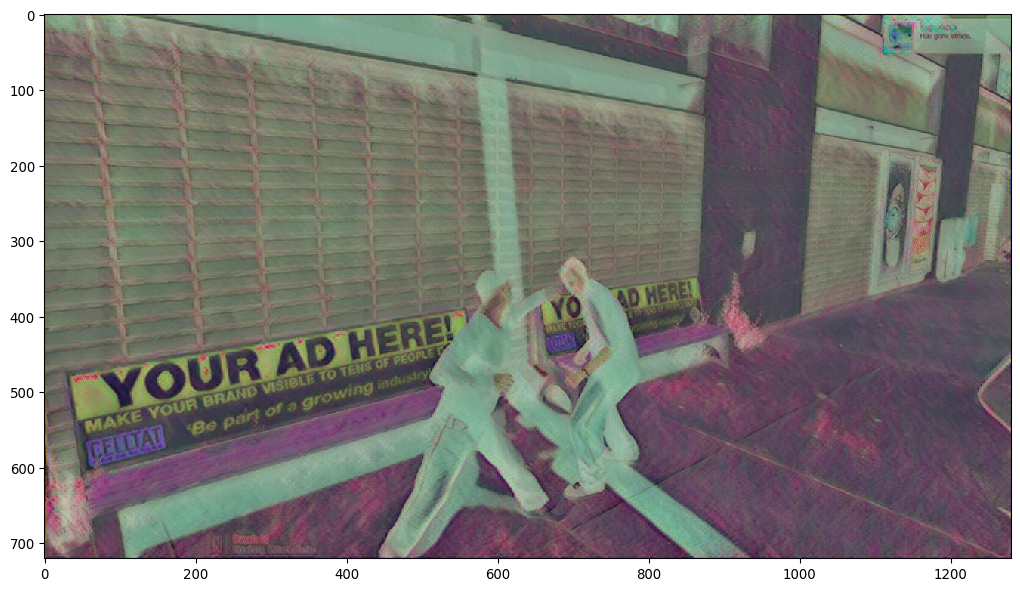

hoi


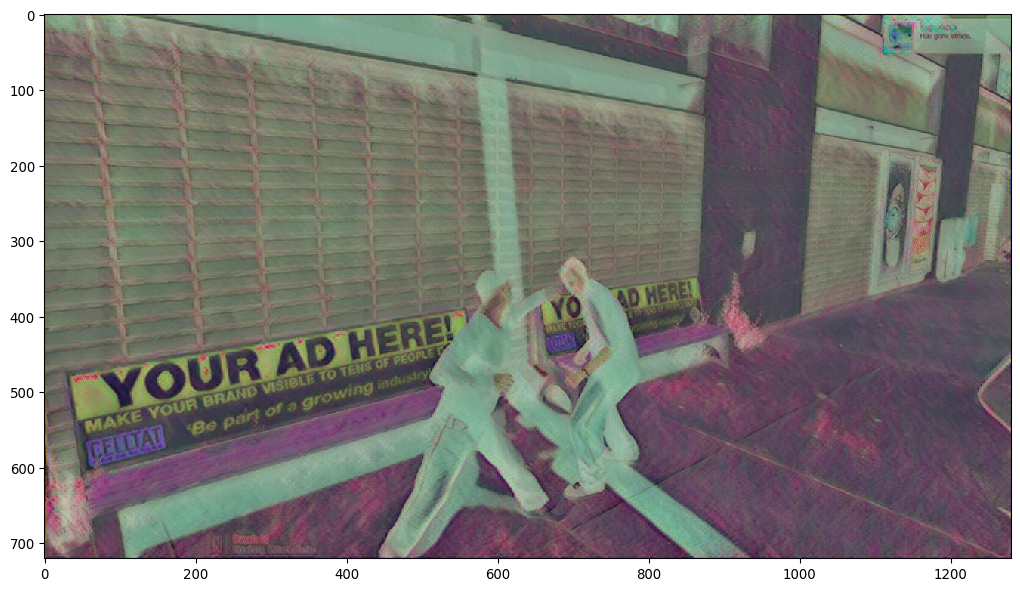

In [31]:
augmentor = StyleAugmentor()
batch_size = 1
embedding = augmentor.sample_embedding(batch_size)
image = cv2.imread('/Users/Stan/Documents/Universiteit/JADS/Semester 3/Thesis/Code/C3D/DataAugmentation.tmp/000064.jpg')
image_styleAugmented = image_StyleAugmentation(embedding, image, augmentor)
ia.imshow(image_styleAugmented)

### Create train batches original images

In [8]:
import glob
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
import glob
import tensorflow.keras as keras
import imgaug as ia
from styleaug import StyleAugmentor

self_classes = []
classes = [i.split(os.path.sep)[1] for i in glob.glob('/Volumes/LogisP/Videos/Movies_Fights/Movies/Frames/*')]

self_classes = [i.split(os.path.sep)[1] for i in glob.glob('/Volumes/LogisP/Videos/Movies_Fights/Movies/Frames/*')]
classes.sort()
target_shape=(112, 112, 3)


#data_aug_1 = keras.preprocessing.image.ImageDataGenerator(
 #   zoom_range=.1,
  #  horizontal_flip=True,
  #  rotation_range=8,
  #  width_shift_range=.2,
  #  height_shift_range=.2)

#By specifying the rotation_range , the data generated is randomly rotated 
#by an angle in the range of +rotation_range to -rotation_range (in degrees).
data_aug_2 = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=90
)

#The width_shift_range is a floating point number between 0.0 and 1.0 which
# specifies the upper bound of the fraction of the total width by which the image
# is to be randomly shifted, either towards the left or right.
data_aug_3 = keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=0.3
)

#Exactly like width shifting, except that the image is shifted vertically instead of horizontally.
data_aug_4 = keras.preprocessing.image.ImageDataGenerator(
    height_shift_range=0.3
)

#The generator will generate images, which on a random basis, will be horizontally flipped.
data_aug_5 = keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip=True
)

#Instead of flipping horizontally, we can also apply a vertical flip
data_aug_6 = keras.preprocessing.image.ImageDataGenerator(
    vertical_flip=True
)

#Shear transformation slants the shape of the image. 'shear_range' specifies the angle of the slant in degrees.
data_aug_7 = keras.preprocessing.image.ImageDataGenerator(
    shear_range=45.0
)

#A random zoom is obtained by the zoom_range argument. A zoom less than 1.0 magnifies the image, while a zoom greater than 1.0 zooms out of the image.
data_aug_8 = keras.preprocessing.image.ImageDataGenerator(
    zoom_range=[0.5, 1.5]
)

#Channel shift randomly shifts the channel values by a random value chosen from the range specified by channel_shift_range.
data_aug_9 = keras.preprocessing.image.ImageDataGenerator(
    brightness_range=[0.5, 0.7]
)
    
def image_StyleAugmentation(embedding, image, augmentor):
    from styleaug import StyleAugmentor
    import torch
    from torchvision.transforms import ToTensor, ToPILImage
    from PIL import Image
    import matplotlib.pyplot as plt
    import numpy as np
    import imgaug as ia

    # PyTorch Tensor <-> PIL Image transforms:
    toTensor = ToTensor()
    toPIL = ToPILImage()
    
    # load image:
    im = Image.fromarray((image * 255).astype(np.uint8))
    im_torch = toTensor(im).unsqueeze(0) # 1 x 3 x 256 x 256

    # randomize style:
    new_image = augmentor(im_torch, embedding=embedding)

    #convert Tensor to PIL image, convert PIL image to numpy ndarray
    numpy_image = np.array(toPIL(new_image.squeeze().cpu()))
    
    #show numpy image
    #ia.imshow(numpy_image)
    
    #show Tensor image
    #plt.imshow(toPIL(new_image.squeeze().cpu()))
    #plt.show()
    
    return (numpy_image / 255)


def generate_video_batch(batch_filepath, batch_framestart):
    """
    Parameters:
        batch_filepath: this is the path from one batch
        batch_framestart: 
    Output:
         Return one batch from input sequence
    """
   
    batch_images = []
    for frame in range(batch_framestart, batch_framestart + 16):
        read_img = cv2.imread((batch_filepath
                               + "/"
                               + "{:0>6d}".format(frame)
                               + ".jpg")) # path of image
        image = cv2.cvtColor(read_img, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (112, 112))#interpolation=cv2.INTER_AREA)
 
 

        #print("De shape is: ", image.shape)
        batch_images.append(image / 255) 
    return batch_images

def __data_aug(self_classes,target_shape,data_aug_traditionalTechniques, data_list):
    """ Make random transformation based on ImageGenerator arguments""" 
    T = None
    X, Y = [], []

    #read text file with sequences
    path = data_list
    with open(path, 'r') as f:
        videos_list = f.readlines()
    
    line_num =0
    augmentation_technique = []
    for batch in (videos_list):
        line_num += 1
        read_batch = batch.split(" ")
        data_location = read_batch[0].split("/")[5:]           
        batch_filepath = "/Volumes/LogisP/Videos/Movies_Fights/" + str(data_location[0]) + "/" + str(data_location[1]) +"/" + str(data_location[2]+ "/" )
        batch_framestart = int(read_batch[1])
        label = int(read_batch[2]) # one hot encoding
        #print(batch_filepath)
        #print(batch_framestart)
        y = []        
        x = []

        image_batch = generate_video_batch(batch_filepath, batch_framestart)
        
        #Choose between traditional techniques
        
        if(len(augmentation_technique) == 0):
            data_aug = data_aug_traditionalTechniques[0]
            augmentation_technique.append(1)
        elif(len(augmentation_technique) == 1):
            data_aug = data_aug_traditionalTechniques[1]
            augmentation_technique.append(1)
        elif(len(augmentation_technique) == 2):
            data_aug = data_aug_traditionalTechniques[2]
            augmentation_technique.append(1)
        elif(len(augmentation_technique) == 3):
            data_aug = data_aug_traditionalTechniques[3]
            augmentation_technique.append(1)
        elif(len(augmentation_technique) == 4):
            data_aug = data_aug_traditionalTechniques[4]
            augmentation_technique.append(1)
        elif(len(augmentation_technique) == 5):
            data_aug = data_aug_traditionalTechniques[5]
            augmentation_technique.append(1)
        elif(len(augmentation_technique) == 6):
            data_aug = data_aug_traditionalTechniques[6]
            augmentation_technique.append(1)
        else:
            data_aug = data_aug_traditionalTechniques[7]
            augmentation_technique = augmentation_technique.clear() 
            augmentation_technique = []
        
        T = data_aug.get_random_transform(target_shape[:2])
        
        for img in image_batch:
            x.append(img)
        
            ####If you want apply traditional data augmentation
            
            #if technique is channel shift
            #if(len(augmentation_technique) == 0): 
             #   x.append(data_aug.apply_transform(img, T).astype('uint32')/255)
           # else:
            #    x.append(data_aug.apply_transform(img, T))
            #x.append(data_aug.apply_transform(img, T))
            #print('Data augmentation afbeelding: ')
            #ia.imshow(data_aug.apply_transform(img, T).astype('uint32'))
            #print(data_aug.apply_transform(img, T).astype('uint32')/255)
            #.astype('uint8')
            #print('type = :) ',type(data_aug.apply_transform(img, T)))
            #print('Orginele afbeelding: ')
            #ia.imshow(img)
            
            #x.append(img)
            
        y = label
        X.append(x)
        Y.append(y)

        y = []        
        x = []
        
        #for img in image_batch:
         #   x.append(img)
        #y = label
        
        #X.append(x)
        #Y.append(y)
        
        print("Running: ",round((line_num/len(videos_list)*100),1), "% complete")
    return np.array(X), np.array(Y)

In [9]:
data_aug_traditionalTechniques = [data_aug_2, data_aug_3, data_aug_4, data_aug_5, data_aug_6, data_aug_7, data_aug_8, data_aug_9 ]

#If you create orignial data augmentation:
x_data, y_data = __data_aug(self_classes,target_shape,data_aug_traditionalTechniques, "/Users/Stan/Documents/Universiteit/JADS/Semester 3/Thesis/Code/MoviesFights.txt")



Running:  0.1 % complete
Running:  0.2 % complete
Running:  0.3 % complete
Running:  0.4 % complete
Running:  0.5 % complete
Running:  0.6 % complete
Running:  0.6 % complete
Running:  0.7 % complete
Running:  0.8 % complete
Running:  0.9 % complete
Running:  1.0 % complete
Running:  1.1 % complete
Running:  1.2 % complete
Running:  1.3 % complete
Running:  1.4 % complete
Running:  1.5 % complete
Running:  1.6 % complete
Running:  1.7 % complete
Running:  1.8 % complete
Running:  1.8 % complete
Running:  1.9 % complete
Running:  2.0 % complete
Running:  2.1 % complete
Running:  2.2 % complete
Running:  2.3 % complete
Running:  2.4 % complete
Running:  2.5 % complete
Running:  2.6 % complete
Running:  2.7 % complete
Running:  2.8 % complete
Running:  2.9 % complete
Running:  3.0 % complete
Running:  3.0 % complete
Running:  3.1 % complete
Running:  3.2 % complete
Running:  3.3 % complete
Running:  3.4 % complete
Running:  3.5 % complete
Running:  3.6 % complete
Running:  3.7 % complete


Running:  29.9 % complete
Running:  30.0 % complete
Running:  30.1 % complete
Running:  30.2 % complete
Running:  30.3 % complete
Running:  30.4 % complete
Running:  30.5 % complete
Running:  30.6 % complete
Running:  30.7 % complete
Running:  30.7 % complete
Running:  30.8 % complete
Running:  30.9 % complete
Running:  31.0 % complete
Running:  31.1 % complete
Running:  31.2 % complete
Running:  31.3 % complete
Running:  31.4 % complete
Running:  31.5 % complete
Running:  31.6 % complete
Running:  31.7 % complete
Running:  31.8 % complete
Running:  31.9 % complete
Running:  31.9 % complete
Running:  32.0 % complete
Running:  32.1 % complete
Running:  32.2 % complete
Running:  32.3 % complete
Running:  32.4 % complete
Running:  32.5 % complete
Running:  32.6 % complete
Running:  32.7 % complete
Running:  32.8 % complete
Running:  32.9 % complete
Running:  33.0 % complete
Running:  33.1 % complete
Running:  33.1 % complete
Running:  33.2 % complete
Running:  33.3 % complete
Running:  33

Running:  59.4 % complete
Running:  59.5 % complete
Running:  59.6 % complete
Running:  59.6 % complete
Running:  59.7 % complete
Running:  59.8 % complete
Running:  59.9 % complete
Running:  60.0 % complete
Running:  60.1 % complete
Running:  60.2 % complete
Running:  60.3 % complete
Running:  60.4 % complete
Running:  60.5 % complete
Running:  60.6 % complete
Running:  60.7 % complete
Running:  60.8 % complete
Running:  60.8 % complete
Running:  60.9 % complete
Running:  61.0 % complete
Running:  61.1 % complete
Running:  61.2 % complete
Running:  61.3 % complete
Running:  61.4 % complete
Running:  61.5 % complete
Running:  61.6 % complete
Running:  61.7 % complete
Running:  61.8 % complete
Running:  61.9 % complete
Running:  62.0 % complete
Running:  62.0 % complete
Running:  62.1 % complete
Running:  62.2 % complete
Running:  62.3 % complete
Running:  62.4 % complete
Running:  62.5 % complete
Running:  62.6 % complete
Running:  62.7 % complete
Running:  62.8 % complete
Running:  62

Running:  88.7 % complete
Running:  88.8 % complete
Running:  88.9 % complete
Running:  89.0 % complete
Running:  89.1 % complete
Running:  89.2 % complete
Running:  89.3 % complete
Running:  89.4 % complete
Running:  89.5 % complete
Running:  89.6 % complete
Running:  89.7 % complete
Running:  89.8 % complete
Running:  89.8 % complete
Running:  89.9 % complete
Running:  90.0 % complete
Running:  90.1 % complete
Running:  90.2 % complete
Running:  90.3 % complete
Running:  90.4 % complete
Running:  90.5 % complete
Running:  90.6 % complete
Running:  90.7 % complete
Running:  90.8 % complete
Running:  90.9 % complete
Running:  91.0 % complete
Running:  91.0 % complete
Running:  91.1 % complete
Running:  91.2 % complete
Running:  91.3 % complete
Running:  91.4 % complete
Running:  91.5 % complete
Running:  91.6 % complete
Running:  91.7 % complete
Running:  91.8 % complete
Running:  91.9 % complete
Running:  92.0 % complete
Running:  92.1 % complete
Running:  92.2 % complete
Running:  92

In [10]:
np.save('/Volumes/LogisP/Videos/Movies_Fights/Movies/Numpy_Files/X_data_MoviesFights', x_data)
print('successfully saved new x_data moviesfights')
print(len(x_data))

successfully saved new x_data moviesfights
1083


In [11]:
np.save('/Volumes/LogisP/Videos/Movies_Fights/Movies/Numpy_Files/Y_data_MoviesFights', y_data)
print('successfully saved new y_data moviesfights')
print(len(y_data))

successfully saved new y_data moviesfights
1083


In [6]:
len(x_data[86])

16

## Create train data

In [3]:
#If you apply traditional data augmentation:
x_data, y_data = __data_aug(self_classes,target_shape,data_aug_traditionalTechniques, "/Users/Stan/Documents/Universiteit/JADS/Semester 3/Thesis/Code/Train.txt")

#If you apply style data augmentation:
#x_data, y_data = __data_aug(self_classes,target_shape, "/Users/Stan/Documents/Universiteit/JADS/Semester 3/Thesis/Code/Train.txt")


Running:  0.2 % complete
Running:  0.3 % complete
Running:  0.5 % complete
Running:  0.6 % complete
Running:  0.8 % complete
Running:  1.0 % complete
Running:  1.1 % complete
Running:  1.3 % complete
Running:  1.4 % complete
Running:  1.6 % complete
Running:  1.8 % complete
Running:  1.9 % complete
Running:  2.1 % complete
Running:  2.2 % complete
Running:  2.4 % complete
Running:  2.6 % complete
Running:  2.7 % complete
Running:  2.9 % complete
Running:  3.0 % complete
Running:  3.2 % complete
Running:  3.4 % complete
Running:  3.5 % complete
Running:  3.7 % complete
Running:  3.8 % complete
Running:  4.0 % complete
Running:  4.2 % complete
Running:  4.3 % complete
Running:  4.5 % complete
Running:  4.6 % complete
Running:  4.8 % complete
Running:  5.0 % complete
Running:  5.1 % complete
Running:  5.3 % complete
Running:  5.4 % complete
Running:  5.6 % complete
Running:  5.8 % complete
Running:  5.9 % complete
Running:  6.1 % complete
Running:  6.2 % complete
Running:  6.4 % complete


Running:  51.0 % complete
Running:  51.2 % complete
Running:  51.4 % complete
Running:  51.5 % complete
Running:  51.7 % complete
Running:  51.8 % complete
Running:  52.0 % complete
Running:  52.2 % complete
Running:  52.3 % complete
Running:  52.5 % complete
Running:  52.6 % complete
Running:  52.8 % complete
Running:  53.0 % complete
Running:  53.1 % complete
Running:  53.3 % complete
Running:  53.4 % complete
Running:  53.6 % complete
Running:  53.8 % complete
Running:  53.9 % complete
Running:  54.1 % complete
Running:  54.2 % complete
Running:  54.4 % complete
Running:  54.6 % complete
Running:  54.7 % complete
Running:  54.9 % complete
Running:  55.0 % complete
Running:  55.2 % complete
Running:  55.4 % complete
Running:  55.5 % complete
Running:  55.7 % complete
Running:  55.8 % complete
Running:  56.0 % complete
Running:  56.2 % complete
Running:  56.3 % complete
Running:  56.5 % complete
Running:  56.6 % complete
Running:  56.8 % complete
Running:  57.0 % complete
Running:  57

In [5]:
np.save('/Volumes/LogisP/Videos/GTA/test/X_data_MixTraditionalTechniquesAugmentationTrain', x_data)
print('successfully saved new x_train data')
print(len(x_data))

successfully saved new x_train data
625


In [6]:
np.save('/Volumes/LogisP/Videos/GTA/test/Y_data_MixTraditionalTechniquesAugmentationTrain', y_data)
print('successfully saved new y_train data')
print(len(y_data))

successfully saved new y_train data
625


In [ ]:
#Load x data augmentation and original x data and concatenate data
import numpy as np
x_data = np.load('/Volumes/LogisP/Videos/GTA/test/X_data_MixTraditionalTechniquesAugmentationTrain.npy')
print('successfully loaded traditional x train')
original_Xdata_array = np.load('/Users/Stan/Downloads/X_data_OriginalImagesTrain.npy')
print('successfully loaded original x train')

concatenated_array = np.concatenate((x_data,original_Xdata_array))
np.save('/Volumes/LogisP/Videos/GTA/test/X_data_MixTraditionalAndNonaugmentedTrain', concatenated_array)
print('concatenated succesfully x train')

successfully loaded traditional x train
successfully loaded original x train


In [ ]:
#Load y data augmentation and original y data and concatenate data
import numpy as np
y_data = np.load('/Volumes/LogisP/Videos/GTA/test/Y_data_MixTraditionalTechniquesAugmentationTrain.npy')
print('successfully loaded traditional y train')
original_Ydata_array = np.load('/Users/Stan/Downloads/Y_data_OriginalImagesTrain.npy')
print('successfully loaded original y train')

concatenated_array = np.concatenate((y_data,original_Ydata_array))
np.save('/Volumes/LogisP/Videos/GTA/test/Y_data_MixTraditionalAndNonaugmentedTrain', concatenated_array)
print('concatenated succesfully y train')

In [ ]:
print(len(concatenated_array))

## Create test data

In [ ]:
#If you apply traditional data augmentation:
x_data, y_data = __data_aug(self_classes,target_shape,data_aug_traditionalTechniques, "/Users/Stan/Documents/Universiteit/JADS/Semester 3/Thesis/Code/Test.txt")

#If you apply style data augmentation:
#x_data, y_data = __data_aug(self_classes,target_shape, "/Users/Stan/Documents/Universiteit/JADS/Semester 3/Thesis/Code/Test.txt")


In [ ]:
np.save('/Volumes/LogisP/Videos/GTA/test/X_data_MixTraditionalTechniquesAugmentationTest', x_data)
print('successfully saved new x_test data')
print(len(x_data))

In [ ]:
np.save('/Volumes/LogisP/Videos/GTA/test/Y_data_MixTraditionalTechniquesAugmentationTest', y_data)
print('successfully saved new y_test data')
print(len(y_data))

In [8]:
#Load x data augmentation and original x data and concatenate data
import numpy as np
x_data = np.load('/Volumes/LogisP/Videos/GTA/test/X_data_MixTraditionalTechniquesAugmentationTest.npy')
print('successfully loaded traditional test')
original_Xdata_array = np.load('/Users/Stan/Downloads/X_data_OriginalImagesTest.npy')
print('successfully loaded original x test')

concatenated_array = np.concatenate((x_data,original_Xdata_array))
np.save('/Volumes/LogisP/Videos/GTA/test/X_data_MixTraditionalAndNonaugmentedTest', concatenated_array)
print('concatenated succesfully x test')

successfully loaded traditional test
successfully loaded original x test
concatenated succesfully x test


In [7]:
#Load y data augmentation and original y data and concatenate data
import numpy as np
y_data = np.load('/Volumes/LogisP/Videos/GTA/test/Y_data_MixTraditionalTechniquesAugmentationTest.npy')
print('successfully loaded traditional y test')
original_Ydata_array = np.load('/Users/Stan/Downloads/Y_data_OriginalImagesTest.npy')
print('successfully loaded original y test')

concatenated_array = np.concatenate((y_data,original_Ydata_array))
np.save('/Volumes/LogisP/Videos/GTA/test/Y_data_MixTraditionalAndNonaugmentedTest', concatenated_array)
print('concatenated succesfully y test')

successfully loaded traditional y test
successfully loaded original y test
concatenated succesfully y test


In [11]:
print(len(concatenated_array))

1250
